## 밑바닥부터 시작하는 딥러닝(Deep Learning from Scratch) 챕터별 예제코드 정리 
예제코드가 기본이나 정확히 일치하지는 않습니다. 개인적으로 모든 코드들을 문서화하되 너무 기본적인 내용은 제외하거나 나름대로 더 필요하다고 생각되는 내용은 추가하였습니다. 같은 내용을 다른 방식으로 구현하는 경우도 있습니다.
## Chapter 3. 신경망
### 3.6 mnist 예제
아래의 코드 중 mnist 데이터를 load하고 ndarray의 형태로 만들어주는 코드인 mnist.py인 아래의 링크에서 확인할 수 있습니다.  

mnist.py : https://github.com/boseop/deep-learning-from-scratch/tree/master/dataset

In [7]:
import sys, os
import pickle
import time
import numpy as np
import matplotlib.pylab as plt
os.chdir('C:\\Users\\KBS\\PycharmProjects\\Deep_learning_scratch') # current working directory 변경
from dataset.mnist import load_mnist # current working directory의 dataset 폴더에 mnist.py script의 사용자 함수인 load_mnist를 load
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = True)

In [8]:
print([[x_train.shape, t_train.shape], [x_test.shape, t_test.shape]]) # train image & label, test image & label

[[(60000, 784), (60000,)], [(10000, 784), (10000,)]]


### mnist 이미지 시각화

5


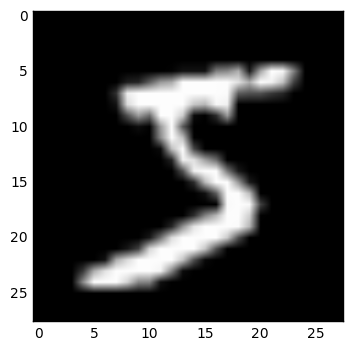

In [11]:
## mnist 이미지 시각화
img = x_train[0].reshape((28, 28)) # 원래 image 형태로 변환
label = t_train[0]
print(label)
plt.imshow(img, cmap = 'gray') # gray scale로 설정
plt.show()

### 신경망을 이용하여 predict (학습파트가 아니므로 미리 학습해놓은 weight를 사용)
신경망의 구조는 (784,50,100,10)으로 training data에 대해서 학습한 weight인 sample_weight.pkl 파일은 아래의 링크에서 확인할 수 있습니다.
추가적으로 배치연산이 더 빠름을 보이기위해서 배치처리를 하지않고 predict하는데 걸리는 시간과 배치처리(데이터 개수 100개씩)를 적용하여 predict하는데 걸리는 시간을 비교합니다. 결론적으로는 배치처리를 하는 것이 시간이 훨씬 적게 걸림을 알 수 있습니다. (아래의 경우는 대략 10배정도의 차이)

sample_weight.pkl : https://github.com/boseop/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl  

In [18]:
### forward (이번챕터에서는 학습을 하지않기때문에 미리 학습된 weight를 사용해서 forward 해본다.)
### 학습을 하는 것이아니므로 predict와 같다.
## 신경망1
# hidden layer에서의 activation function으로 sigmoid를 활용한다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# mnist는 10개의 범주를 가지고있으므로 output activation function으로 softmax를 활용한다.
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def init_network():
    with open('C:/Users/KBS/PycharmProjects/Deep_learning_scratch/dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network # dictionary 형태의 instance로 각 hidden layer의 weight와 bias가 저장되어있다.

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    pre_A1 = np.dot(x, W1) + B1
    A1 = sigmoid(pre_A1)
    pre_A2 = np.dot(A1, W2) + B2
    A2 = sigmoid(pre_A2)
    pre_A3 = np.dot(A2, W3) + B3
    y = softmax(pre_A3)
    return y

network = init_network()
accuracy_cnt = 0

tic_ann1 = time.clock()
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_cnt += 1
toc_ann1 = time.clock()

print('Accuracy:' + str(float(accuracy_cnt / len(x_test))),'\ntime:',toc_ann1 - tic_ann1)

Accuracy:0.9352 
time: 0.5403722285636832


In [19]:
## 신경망2 (배치처리), 배치단위로 계산하는 것이 연산상에 이득이므로
accuracy_cnt = 0
batch_size = 100

tic_ann2 = time.clock()
for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t_test[i:i+batch_size])
toc_ann2 = time.clock()

print('Accuracy:' + str(float(accuracy_cnt / len(x_test))),'\ntime:',toc_ann2 - tic_ann2)

Accuracy:0.9352 
time: 0.050763280555713663
